# Hackathon


### Link com concorrentes para análise de Dados:

https://www.livup.com.br/pratos

https://www.keeplight.com.br/

https://www.luccofit.com.br/cardapio?O=OrderByTopSaleDESC

https://www.beleaf.com.br/cardapio-comida-congelada-2?utm_expid=.yqTz-YpYT-O6ZdIbyOxjqw.1&utm_referrer=https%3A%2F%2Fwww.beleaf.com.br%2Fcomida-saudavel 

https://www.chefcongelados.com.br/individuais

https://panelinhafit.com.br/ 

### Pesquisa de quanto o orçamento das pessoas vai para cada tipo de alimento:

https://food.opendata.ch/#fooddata

https://www.fipe.org.br/pt-br/indices/pof/#pof---2011-2013

https://rapidapi.com/spoonacular/api/recipe-food-nutrition

# Importando as bibliotecas necessárias

In [1]:
import pandas as pd  
import numpy as np    
import requests
from bs4 import BeautifulSoup

# Código para fazer o scrape do site Chef_Congelados

In [2]:
palavras = ['vegetarianos','sem-gluten', 'loja', 'low-carb','sele-o-chef']

def scraper_chef_congelados(word):
    Fonte = 'chefcongelados'
    url = 'https://www.chefcongelados.com.br/' + str(word)
    data = requests.get(url)
    soup = BeautifulSoup(data.content, 'html.parser')
    categoria = word
    if categoria == 'sele-o-chef':
        categoria = 'seleção-do-chef'
    if categoria == 'loja':
        categoria = 'seleção-saudaveis'
    preço = soup.find_all('span', {'class' : "_23ArP"})
    preço = [float(item.get_text().lstrip('R').lstrip('$')) for item in preço]
    nome_comp = soup.find_all('h3', {'class' : "_2BULo"})
    nome_comp = [item.get_text() for item in nome_comp]
    table = pd.DataFrame({'Preço': preço, 'Prato': nome_comp, 'Categoria': categoria, 'Fonte':Fonte})
    return table

### Apenas um teste.

In [3]:
scraper_chef_congelados('vegetarianos')

,Preço,Prato,Categoria,Fonte
0,28.5,"Moqueca de Palmito Natural com Legumes, Soja M...",vegetarianos,chefcongelados
1,28.5,Kibe de Abóbora e Quinua com Legumes ao Curry ...,vegetarianos,chefcongelados
2,28.5,Strogonoff de Palmito e Arroz Integral com Batata,vegetarianos,chefcongelados
3,28.5,Bife de Berinjela c/ Bolognesa de Lentilha e ...,vegetarianos,chefcongelados
4,28.5,Escondidinho de Batata Doce e Baião de Dois,vegetarianos,chefcongelados
5,28.5,"Cassoulet de Legumes, Arroz Integral com Abobr...",vegetarianos,chefcongelados
6,28.5,Ensopado Vegetariano com Arroz Basmati,vegetarianos,chefcongelados
7,28.5,Nhoque de Batata Doce ao Molho de Berinjela,vegetarianos,chefcongelados
8,24.5,Berinjela à Parmegiana Versatile,vegetarianos,chefcongelados
9,22.9,Lasanha de Abobrinha Assada ao Pomodoro e 3 Qu...,vegetarianos,chefcongelados


## Agora sim, fazendo o Scrape da parte relativa a alimentos saudáveis

In [4]:
df = pd.DataFrame(columns=['Preço', 'Prato', 'Categoria', 'Fonte'])
for palavra in palavras:
    df = df.append(scraper_chef_congelados(palavra))
    

In [5]:
df= df.reset_index(drop=True)
df

,Preço,Prato,Categoria,Fonte
0,28.5,"Moqueca de Palmito Natural com Legumes, Soja M...",vegetarianos,chefcongelados
1,28.5,Kibe de Abóbora e Quinua com Legumes ao Curry ...,vegetarianos,chefcongelados
2,28.5,Strogonoff de Palmito e Arroz Integral com Batata,vegetarianos,chefcongelados
3,28.5,Bife de Berinjela c/ Bolognesa de Lentilha e ...,vegetarianos,chefcongelados
4,28.5,Escondidinho de Batata Doce e Baião de Dois,vegetarianos,chefcongelados
5,28.5,"Cassoulet de Legumes, Arroz Integral com Abobr...",vegetarianos,chefcongelados
6,28.5,Ensopado Vegetariano com Arroz Basmati,vegetarianos,chefcongelados
7,28.5,Nhoque de Batata Doce ao Molho de Berinjela,vegetarianos,chefcongelados
8,24.5,Berinjela à Parmegiana Versatile,vegetarianos,chefcongelados
9,22.9,Lasanha de Abobrinha Assada ao Pomodoro e 3 Qu...,vegetarianos,chefcongelados


#### Exportando as informações necessárias

In [6]:
df.to_csv('chefcongelados.csv', sep=';', encoding='utf-8', index=False)

# Análise Exploratória dos Dados (EDA)

#### Qual a proporção de pratos preparados para cada seleção?

In [7]:
df['Categoria'].value_counts()*100/len(df['Categoria'])

seleção-saudaveis    28.571429
low-carb             25.714286
vegetarianos         21.428571
seleção-do-chef      15.714286
sem-gluten            8.571429
Name: Categoria, dtype: float64

#### Qual o preço praticado para cada categoria de pratos?

In [8]:
df.pivot_table(values='Preço', columns='Categoria', aggfunc={np.mean, 'max', 'min'})

Categoria,low-carb,seleção-do-chef,seleção-saudaveis,sem-gluten,vegetarianos
max,38.900000,35.900000,35.90,28.90,34.500000
mean,26.866667,34.290909,27.54,23.35,26.966667
min,22.500000,32.800000,22.50,11.40,22.900000


# Agregando os demais arquivos produzidos pelos demais colegas:

### Leitura, tratamento e junção de todos os arquivos.

In [9]:
# Agora leremos os demais arquivos:
df2 = pd.read_csv('keeplight.csv', delimiter=';')
df3 = pd.read_csv('Leve_Chef.csv', delimiter=';')
df4 = pd.read_csv('livup.csv', delimiter=';')
df5 = pd.read_csv('luccofit.csv', delimiter=';')
df6 = pd.read_csv('panelinha_fit.csv', delimiter=';')
df7 = pd.read_csv('DFBELEAF1.csv', delimiter=';')

In [10]:
df7.columns

Index(['Prato', 'Acompanhameto', 'Preço', 'Fonte'], dtype='object')

In [11]:
#corrigindo o nome da coluna Acompanhamento
df7.columns =['Prato', 'Acompanhamento', 'Preço','Fonte']

In [12]:
df7.head(1)

,Prato,Acompanhamento,Preço,Fonte
0,BURRITO BOWL,"Milho verde, tomate, cenoura e repolho roxo",19.9,Beleaf


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
Prato    57 non-null object
Peso     57 non-null object
Preço    57 non-null object
Fonte    57 non-null object
dtypes: object(4)
memory usage: 1.9+ KB


In [14]:
df3.head(2)

,Prato,Peso,Preço,Fonte
0,Kit Saladas (04 saladas),0g,"59,90",Leve Chef
1,Kit Saladas (08 saladas),0g,"99,90",Leve Chef


In [15]:
# corrigindo a forma e tipo da coluna 'Preço' 
df3['Preço'] = df3['Preço'].apply(lambda x: float(x.split(',')[0]+'.'+x.split(',')[1]))

In [16]:
df3['Peso'] = df3['Peso'].apply(lambda x: float(x.split('g')[0]))

In [17]:
df5['Peso']

0                                                   150
1                                                  200g
2                                       100g (1 porção)
3                                       100g (1 porção)
4                                       250g (1 porção)
5                                       320g (1 porção)
6                                                   NaN
7                                                   NaN
8                                       320g (1 porção)
9                                       320g (1 porção)
10                                      250g (1 porção)
11                 CaracterísticasLow carb, Sem lactose
12                                                 100g
13                                                  150
14                                                 200g
15                                      100g (1 porção)
16                                      100g (1 porção)
17                                      250g (1 

In [18]:
def retifica(string):
    try:
        a = re.findall(r'.*(\d{3,})g?',string)[0]
        return a
    except:
        a = np.nan

In [19]:
import re
df5['Peso'] = df5['Peso'].apply(retifica)

In [20]:
df5['Calorias'] = df5['Calorias'].apply(retifica)

In [21]:
df5

,posi,Prato,link,Preço,Fonte,Peso,ingredientes,Calorias
0,1,Quibe Recheado Com Ricota Coberto com Amêndoas...,https://www.luccofit.com.br/congelada-quibe-re...,14.90,luccofit,150,"Carne bovina patinho, trigo, cebola, queijo mu...",274
1,2,Burguer de Patinho com Purê de Mandioquinha - ...,https://www.luccofit.com.br/burguer-patinho-pu...,17.50,luccofit,200,"Burguer de patinho, purê de mandioquinha.",024
2,3,Crepioca de frango,https://www.luccofit.com.br/crepioca-frango/p,9.90,luccofit,100,"Queijo muçarela light, peito de frango, ovo co...",882
3,4,Crepioca de Marguerita,https://www.luccofit.com.br/crepioca-de-margue...,9.90,luccofit,100,"Queijo muçarela light, manjericão, ovo de gali...",882
4,5,Escondidinho de carne com mandioca - 250g,https://www.luccofit.com.br/escondidinho-carne...,16.74,luccofit,250,": carne moída (carne bovina de patinho, salsin...",359
5,6,Carne Desfiada Com Batata Sauté e Brócolis – 320g,https://www.luccofit.com.br/marmita-fitness-ca...,22.00,luccofit,320,"brócolis chinês, batata inglesa sauté, carne d...",901
6,7,Panqueca Integral De Frango - 1 Unid.,https://www.luccofit.com.br/marmita-fitness-pa...,16.00,luccofit,None,NaN,None
7,8,Panqueca Integral De Carne - 1 Unid.,https://www.luccofit.com.br/marmita-fitness-pa...,16.50,luccofit,None,[],None
8,9,Tilápia Grelhada Com Purê De Mandioquinha e Br...,https://www.luccofit.com.br/marmita-fitness-ti...,21.90,luccofit,320,"brócolis, purê de mandioquinha (mandioquinha, ...",011
9,10,Filé De Salmão Com Purê de Abóbora e Mix De Ve...,https://www.luccofit.com.br/marmita-fitness-fi...,24.50,luccofit,320,"mix de legumes (brócolis, cenoura, couve flor,...",799


#### Agregando todos os arquivos

In [22]:
# Agora vamos agregar todos os arquivos

df_tot = df.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)

df_tot.dataframeName = 'pratos.csv'

linhas, colunas = df_tot.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [23]:
print('linhas: {}\n colunas: {}'.format(linhas, colunas))

linhas: 470
 colunas: 12


In [24]:
df_tot

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi
0,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,"Moqueca de Palmito Natural com Legumes, Soja M...",28.5,NaN,NaN,NaN
1,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Kibe de Abóbora e Quinua com Legumes ao Curry ...,28.5,NaN,NaN,NaN
2,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Strogonoff de Palmito e Arroz Integral com Batata,28.5,NaN,NaN,NaN
3,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Bife de Berinjela c/ Bolognesa de Lentilha e ...,28.5,NaN,NaN,NaN
4,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Escondidinho de Batata Doce e Baião de Dois,28.5,NaN,NaN,NaN
5,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,"Cassoulet de Legumes, Arroz Integral com Abobr...",28.5,NaN,NaN,NaN
6,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Ensopado Vegetariano com Arroz Basmati,28.5,NaN,NaN,NaN
7,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Nhoque de Batata Doce ao Molho de Berinjela,28.5,NaN,NaN,NaN
8,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Berinjela à Parmegiana Versatile,24.5,NaN,NaN,NaN
9,NaN,NaN,vegetarianos,chefcongelados,NaN,NaN,NaN,Lasanha de Abobrinha Assada ao Pomodoro e 3 Qu...,22.9,NaN,NaN,NaN


In [25]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 19
Data columns (total 12 columns):
Acompanhamento    126 non-null object
Calorias          249 non-null object
Categoria         236 non-null object
Fonte             405 non-null object
Mais pedido       106 non-null float64
Nome              65 non-null object
Peso              303 non-null object
Prato             405 non-null object
Preço             470 non-null float64
ingredientes      91 non-null object
link              92 non-null object
posi              92 non-null float64
dtypes: float64(3), object(9)
memory usage: 47.7+ KB


### Tratamento da coluna 'Categorias'

In [26]:
df_tot['Categoria'].value_counts()

Carnes vermelhas          30
Peixes e frutos do mar    28
Vegetarianos              20
seleção-saudaveis         20
Frangos                   18
low-carb                  18
frango                    15
vegetarianos              15
low carb                  14
carne vermelha            12
seleção-do-chef           11
Massas                    10
sopas                     10
sem-gluten                 6
peixe                      5
vegetariano                4
Name: Categoria, dtype: int64

In [27]:
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: str(x).lower())

In [28]:
df_tot['Categoria'].value_counts()

nan                       234
vegetarianos               35
carnes vermelhas           30
peixes e frutos do mar     28
seleção-saudaveis          20
frangos                    18
low-carb                   18
frango                     15
low carb                   14
carne vermelha             12
seleção-do-chef            11
sopas                      10
massas                     10
sem-gluten                  6
peixe                       5
vegetariano                 4
Name: Categoria, dtype: int64

In [29]:
veg = ['vegetarianos', 'vegetariano']
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: 'vegetariano' if str(x) in veg else str(x))

car = ['carnes vermelhas', 'carne vermelha']
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: 'carne vermelha' if str(x) in car else str(x))

frang = ['frangos', 'frango']
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: 'frango' if str(x) in frang else str(x))

low = ['low-carb', 'low carb']
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: 'low carb' if str(x) in low else str(x))

mar = ['peixes e frutos do mar', 'peixe']
df_tot['Categoria'] = df_tot['Categoria'].apply(lambda x: 'peixes e frutos do mar' if str(x) in mar else str(x))

In [30]:
df_tot['Categoria'].value_counts()

nan                       234
carne vermelha             42
vegetariano                39
frango                     33
peixes e frutos do mar     33
low carb                   32
seleção-saudaveis          20
seleção-do-chef            11
massas                     10
sopas                      10
sem-gluten                  6
Name: Categoria, dtype: int64

### Preços médio, mínimo e máximo para cada categoria

In [31]:
df_tot[df_tot['Categoria']!='nan'].pivot_table(values='Preço', columns='Categoria', aggfunc={np.mean, 'max', 'min'})

Categoria,carne vermelha,frango,low carb,massas,peixes e frutos do mar,seleção-do-chef,seleção-saudaveis,sem-gluten,sopas,vegetariano
max,33.300000,27.700000,38.900000,20.40,35.70000,35.900000,35.90,28.90,18.5,34.500000
mean,21.545238,18.678788,22.678125,18.02,25.49697,34.290909,27.54,23.35,18.5,22.984615
min,12.000000,10.000000,13.500000,14.80,16.00000,32.800000,22.50,11.40,18.5,11.000000


In [32]:
# Número de pratos de cada categoria obtidos através de scrape
# De certa forma pode retratar a importância de cada categoria para os sites estudados.

In [33]:
df_tot['Categoria'].value_counts()

nan                       234
carne vermelha             42
vegetariano                39
frango                     33
peixes e frutos do mar     33
low carb                   32
seleção-saudaveis          20
seleção-do-chef            11
massas                     10
sopas                      10
sem-gluten                  6
Name: Categoria, dtype: int64

### Preços médio, mínimo e máximo para cada categoria

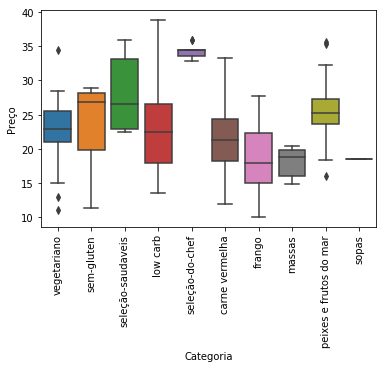

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

graf1=sns.boxplot(x='Categoria', y='Preço', data=df_tot[df_tot['Categoria']!='nan'])
plt.xticks(rotation=90)
graf1.figsize=(15,10)
plt.show()

### Ajustando as colunas 'Prato', 'Acompanhamento', 'Nome' e 'ingredientes'

In [35]:
df_tot.head(3)

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi
0,NaN,NaN,vegetariano,chefcongelados,NaN,NaN,NaN,"Moqueca de Palmito Natural com Legumes, Soja M...",28.5,NaN,NaN,NaN
1,NaN,NaN,vegetariano,chefcongelados,NaN,NaN,NaN,Kibe de Abóbora e Quinua com Legumes ao Curry ...,28.5,NaN,NaN,NaN
2,NaN,NaN,vegetariano,chefcongelados,NaN,NaN,NaN,Strogonoff de Palmito e Arroz Integral com Batata,28.5,NaN,NaN,NaN


In [36]:
df_tot['Prato_geral'] = df_tot['Prato'] + ' | '+ df_tot['Acompanhamento']

In [37]:
df_tot['Prato_geral'].fillna(value = df_tot['Prato'], inplace = True)

In [38]:
df_tot[df_tot['Prato_geral'].isnull()]

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi,Prato_geral
0,NaN,231,nan,NaN,NaN,Escondidinho de Frango e Batata Doce,NaN,NaN,26.0,NaN,NaN,NaN,NaN
1,NaN,271,nan,NaN,NaN,Estrogonofe de Frango Proteico,NaN,NaN,28.0,NaN,NaN,NaN,NaN
2,NaN,200,nan,NaN,NaN,Filé de Frango com Abobrinha Proteico,NaN,NaN,28.0,NaN,NaN,NaN,NaN
3,NaN,200,nan,NaN,NaN,Frango à Caçadora,NaN,NaN,29.0,NaN,NaN,NaN,NaN
4,NaN,223,nan,NaN,NaN,Frango à Parmegiana,NaN,NaN,29.0,NaN,NaN,NaN,NaN
5,NaN,382,nan,NaN,NaN,Frango ao Molho de Queijo,NaN,NaN,28.0,NaN,NaN,NaN,NaN
6,NaN,367,nan,NaN,NaN,Frango ao Molho de Queijo Proteico,NaN,NaN,28.0,NaN,NaN,NaN,NaN
7,NaN,267,nan,NaN,NaN,Frango Picante,NaN,NaN,29.0,NaN,NaN,NaN,NaN
8,NaN,236,nan,NaN,NaN,Paillard de Frango com Espinafre,NaN,NaN,25.0,NaN,NaN,NaN,NaN
9,NaN,276,nan,NaN,NaN,Polpetone de Frango com Espinafre,NaN,NaN,25.0,NaN,NaN,NaN,NaN


In [39]:
df_tot['Prato_geral'].fillna(value = df_tot['Nome'], inplace = True)

In [40]:
df_tot[df_tot['Prato_geral'].isnull()] # Agora 'Prato_geral' carrega a descrição dos pratos e não tem mais linhas vazias.

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi,Prato_geral


In [41]:
df_tot[(df_tot['Nome'].notnull())&(df_tot['Acompanhamento'].notnull())]

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi,Prato_geral


In [42]:
df_tot[(df_tot['Nome'].notnull())&(df_tot['Prato'].notnull())]

,Acompanhamento,Calorias,Categoria,Fonte,Mais pedido,Nome,Peso,Prato,Preço,ingredientes,link,posi,Prato_geral


### Agora que todas as informações referentes ao nome ou composição do prato estão em 'Prato_geral' podemos descartar as colunas Acompanhamento, Nome e Prato.

In [43]:
df_tot.drop(columns=['Acompanhamento','Nome', 'Prato'], inplace=True)

In [44]:
df_tot.reset_index(drop=True)

,Calorias,Categoria,Fonte,Mais pedido,Peso,Preço,ingredientes,link,posi,Prato_geral
0,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,"Moqueca de Palmito Natural com Legumes, Soja M..."
1,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Kibe de Abóbora e Quinua com Legumes ao Curry ...
2,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Strogonoff de Palmito e Arroz Integral com Batata
3,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Bife de Berinjela c/ Bolognesa de Lentilha e ...
4,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Escondidinho de Batata Doce e Baião de Dois
5,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,"Cassoulet de Legumes, Arroz Integral com Abobr..."
6,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Ensopado Vegetariano com Arroz Basmati
7,NaN,vegetariano,chefcongelados,NaN,NaN,28.5,NaN,NaN,NaN,Nhoque de Batata Doce ao Molho de Berinjela
8,NaN,vegetariano,chefcongelados,NaN,NaN,24.5,NaN,NaN,NaN,Berinjela à Parmegiana Versatile
9,NaN,vegetariano,chefcongelados,NaN,NaN,22.9,NaN,NaN,NaN,Lasanha de Abobrinha Assada ao Pomodoro e 3 Qu...


### Verifiquemos a relação entre Preço, Calorias e Preço

In [45]:
# A primeira etapa é selecionar um conjunto de dados em que estas três informações estejam disponíveis:

In [46]:
df_tot[(df_tot['Calorias'].notnull())&(df_tot['Peso'].notnull())&(df_tot['Preço'].notnull())][['Calorias','Preço','Peso']]

,Calorias,Preço,Peso
0,415,24.3,320
1,363,21.3,360
2,351,23.7,320
3,507,22.3,370
4,374,24.3,320
5,369,18.4,210
6,317,23.7,330
7,478,22.3,320
8,395,26.3,320
9,384,25.3,320


In [47]:
# verificando o tipo de dados

In [48]:
df_tot[(df_tot['Calorias'].notnull())&
       (df_tot['Peso'].notnull())&
       (df_tot['Preço'].notnull())][['Calorias','Preço','Peso']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 91
Data columns (total 3 columns):
Calorias    183 non-null object
Preço       183 non-null float64
Peso        183 non-null object
dtypes: float64(1), object(2)
memory usage: 5.7+ KB


In [79]:
estudo = df_tot[(df_tot['Calorias'].notnull())&
       (df_tot['Peso'].notnull())&
       (df_tot['Preço'].notnull())][['Calorias','Preço','Peso','Categoria']].copy()

In [80]:
estudo['Calorias'] = estudo['Calorias'].astype(float)
estudo['Peso'] = estudo['Peso'].astype(float)
estudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 91
Data columns (total 4 columns):
Calorias     183 non-null float64
Preço        183 non-null float64
Peso         183 non-null float64
Categoria    183 non-null object
dtypes: float64(3), object(1)
memory usage: 7.1+ KB


In [51]:
# agora que já tratamos os tipos de variável relacionadas a preço, peso e calorias, podemos explorar suas relações:

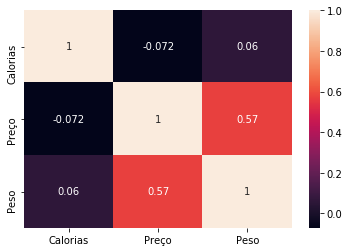

In [81]:
sns.heatmap(estudo.corr(), annot=True)

### Variação de preços com peso

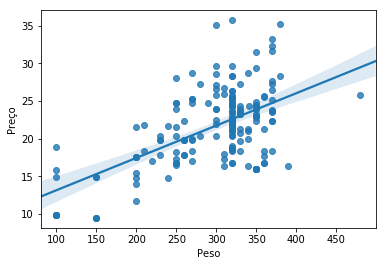

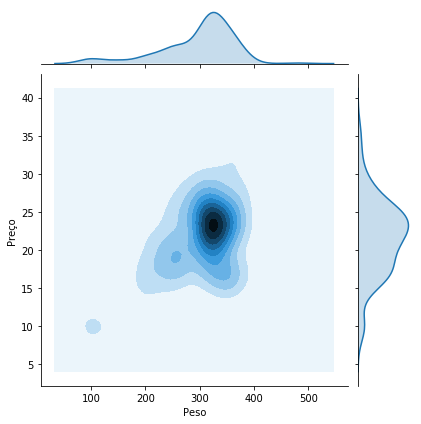

In [53]:
sns.regplot(x='Peso', y='Preço', data=estudo)
sns.jointplot(x='Peso', y='Preço', data=estudo, kind='kde')

In [ ]:
# Conseguimos ver que peso e preço têm algum grau de correlação e se concentram em torno de valores bem definidos.

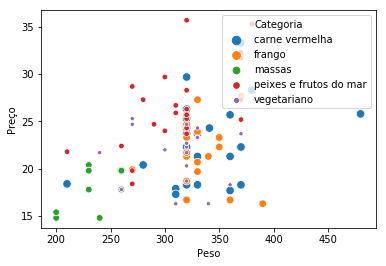

In [88]:
graf2 = sns.scatterplot(x='Peso', y='Preço', data=estudo[estudo['Categoria']!='nan'], size='Categoria', hue='Categoria')
plt.legend()

#Esta é uma primeira tentativa de identificar a categoria do produto em relação a seu peso e preço.

In [54]:
df_tot['Prato_geral']

0     Moqueca de Palmito Natural com Legumes, Soja M...
1     Kibe de Abóbora e Quinua com Legumes ao Curry ...
2     Strogonoff de Palmito e Arroz Integral com Batata
3     Bife de Berinjela c/  Bolognesa de Lentilha e ...
4           Escondidinho de Batata Doce e Baião de Dois
5     Cassoulet de Legumes, Arroz Integral com Abobr...
6                Ensopado Vegetariano com Arroz Basmati
7           Nhoque de Batata Doce ao Molho de Berinjela
8                      Berinjela à Parmegiana Versatile
9     Lasanha de Abobrinha Assada ao Pomodoro e 3 Qu...
10                    Talharim aos 2 Queijos e Brócolis
11                               Talharim aos 2 Queijos
12    Strogonoff de Soja, Arroz Integral à Grega e B...
13    Feijoada Vegana de Soja, Arroz Integral, Couve...
14    Quibe Assado com Ricota, Lentilha e Arroz Inte...
15        Coxinha de Frango Sem Glúten - Irani Maggiore
16          Torta de Frango Sem Glúten - Irani Maggiore
17     Lasanha de Abobrinha Sem Glúten - Irani M

### Salvando as informações no arquivo 'pratos.csv'

In [55]:
df.to_csv('pratos.csv', sep=';', encoding='utf-8', index=False)

### Tentativa de insight por Bag-of-Words

In [56]:
def removeStuff(string):
    
    pattern = [
    r"[.%!+;={}():/\[\]\@\?\"]",   #remove punctuation
    r"U\+.{4}",      #remove unicode
    r"\d*",          #remove numbers
    r"\b[a-z]\b",    #remove single characters
    ]
    
    for x in pattern:
        string = re.sub(x, '', string)
    return string


In [57]:
corpus = list(df_tot['Prato_geral'].values)

stop_words=['de','ao','com','e','da','do','em','na','no','a','o','-', '|', 'gr', 'int'] 

bagOfWords = []
termFreq = []
    
for el in corpus:
    el = el.lower()
    el = removeStuff(el)
    el = el.split()
    for word in el:
            word = word.strip(' ').strip(',').strip(' ')
            if word not in stop_words and word not in bagOfWords:
                bagOfWords.append(word)
    
   
i = 0
for i in range(len(corpus)):
    termFreq.append([])
    for word in bagOfWords:
        c = corpus[i].count(word)
        termFreq[i].append(c)
    i+=1
    
print(bagOfWords)

['moqueca', 'palmito', 'natural', 'legumes', 'soja', 'marinada', 'arroz', 'cereais', 'kibe', 'abóbora', 'quinua', 'curry', 'integral', 'agrião', 'strogonoff', 'batata', 'bife', 'berinjela', 'bolognesa', 'lentilha', 'cenoura', 'escondidinho', 'doce', 'baião', 'dois', 'cassoulet', 'abobrinha', 'brasileira', 'ensopado', 'vegetariano', 'basmati', 'nhoque', 'molho', 'à', 'parmegiana', 'versatile', 'lasanha', 'assada', 'pomodoro', 'queijos', 'talharim', 'aos', 'brócolis', 'grega', 'dorê', 'feijoada', 'vegana', 'couve', 'farofa', 'quibe', 'assado', 'ricota', 'coxinha', 'frango', 'sem', 'glúten', 'irani', 'maggiore', 'torta', 'tofú', 'alere', 'gourmet', 'mandioquinha', 'filé', 'peixe', 'mediterrâneo', 'falso', 'flor', 'hamburguer', 'ervilhas', 'frescas', 'leito', 'purê', 'especiarias', 'sopa', 'detox', 'hortaliças', 'chia', 'picadinho', 'carne', 'cogumelos', 'mineira', 'canja', 'sauté', 'hamburger', 'gengibre', 'mostarda', 'mel', 'risoto', 'abobrinhas', 'ervas', 'homus', 'trio', 'grelhados', '

In [58]:
FreqPalavras = pd.DataFrame(termFreq, columns=bagOfWords)
FreqPalavras

,moqueca,palmito,natural,legumes,soja,marinada,arroz,cereais,kibe,abóbora,...,refogados,cuscuz,bobó,moranga,italiano,caprese,escarola,paella,negra,panache
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
pd.DataFrame(FreqPalavras.sum().sort_values(ascending=False), columns=['freq']).drop_duplicates()['freq']

legumes        85
integral       76
vapor          70
congelada      65
arroz          52
castanha       45
batata         44
mel            42
tomate         39
cogumelo       34
cogumelos      31
assados        30
frango         28
flor           27
assada         26
alecrim        24
proteína       22
negro          21
coco           20
rústica        19
mostarda       18
brócolis       17
amêndoas       16
pesto          15
carioca        14
alho           13
óleo           12
limão          11
marroquino     10
peter           9
ratatouille     8
lemon           7
edamame         6
balsamico       5
parmesão        4
cateto          3
moida           2
filé            1
grelhados       0
Name: freq, dtype: int64

In [60]:
#Para ver depois:
# https://www.kaggle.com/bls/eating-health-module-dataset
# 